In [2]:
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import preprocessing
import matplotlib.pyplot as plote

from sklearn import cross_validation, metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

/home/ayush/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
data = pd.read_csv('./GDSChackathon.csv')

In [6]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

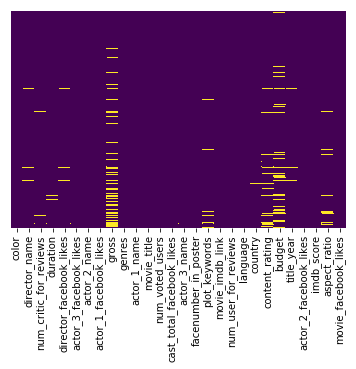

In [8]:
sns.heatmap(data.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')
#YELLOW LINES REPRESENT MISSING VALUES.

In [9]:
#mode
data['country'].fillna(data['country'].mode()[0], inplace=True)
data['language'].fillna(data['language'].mode()[0], inplace=True)
data['color'].fillna(data['color'].mode()[0], inplace=True)
data['director_name'].fillna(data['director_name'].mode()[0], inplace=True)
data['actor_2_name'].fillna(data['actor_2_name'].mode()[0], inplace=True)
data['actor_1_name'].fillna(data['actor_1_name'].mode()[0], inplace=True)
data['content_rating'].fillna(data['content_rating'].mode()[0], inplace=True)
data['movie_title'].fillna(data['movie_title'].mode()[0], inplace=True)
data['actor_3_name'].fillna(data['actor_3_name'].mode()[0], inplace=True)  
#
data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].mode()[0], inplace=True) 
data['director_facebook_likes'].fillna(data['director_facebook_likes'].mode()[0], inplace=True) 
data['actor_3_facebook_likes'].fillna(data['actor_3_facebook_likes'].mode()[0], inplace=True) 
data['actor_1_facebook_likes'].fillna(data['actor_1_facebook_likes'].mode()[0], inplace=True) 
data['gross'].fillna(data['gross'].mode()[0], inplace=True) 
data['facenumber_in_poster'].fillna(data['facenumber_in_poster'].mode()[0], inplace=True) 
data['num_user_for_reviews'].fillna(data['num_user_for_reviews'].mode()[0], inplace=True) 
data['budget'].fillna(data['budget'].mode()[0], inplace=True) 
data['title_year'].fillna(data['title_year'].mode()[0], inplace=True) 
data['actor_2_facebook_likes'].fillna(data['actor_2_facebook_likes'].mode()[0], inplace=True) 
data['aspect_ratio'].fillna(data['aspect_ratio'].mode()[0], inplace=True) 
data['duration'].fillna(data['duration'].mode()[0], inplace=True) 


In [10]:
encoding_list = [ 'country','color','director_name','actor_2_name','content_rating','movie_title','actor_1_name','actor_3_name','language']
data[encoding_list] = data[encoding_list].apply(LabelEncoder().fit_transform)


In [11]:
scale_list = ['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 
        'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
        'aspect_ratio', 'movie_facebook_likes']
sc = data[scale_list]
scaler = StandardScaler()
sc = scaler.fit_transform(sc)
data[scale_list] = sc
data[scale_list].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,...,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,0.207931,-0.481597,4.797503,2.814318,-0.241367,0.125431,-0.122986,-0.369902,11.160073,-1.289093,...,-0.679747,7.369256,-0.177602,0.402767,-0.354117,1.016877,0.516327,-0.176884,-0.335116,1.318632
1,0.207931,-0.663789,1.340129,2.456819,-0.039256,0.212714,0.797535,2.228319,4.168026,-0.106818,...,-0.679747,2.559467,-0.177602,0.402767,-0.354117,1.338521,0.354713,0.829814,0.090444,-0.389572
2,0.207931,1.082693,3.803816,1.622653,-0.241367,-0.292328,1.105131,0.296309,2.473418,-1.147951,...,-0.182725,1.913218,-0.177602,0.337049,-0.354117,1.057721,1.001167,-0.311391,0.090444,4.010348
3,0.207931,-1.263030,5.536609,2.258208,7.656405,13.455777,-1.113878,1.362246,6.318278,1.532095,...,-0.679747,6.434314,-0.177602,0.402767,-0.354117,1.083248,0.758747,5.288616,0.090444,8.099687
4,0.207931,-0.939924,-1.131770,-0.681231,-0.194340,0.212714,1.041569,-0.427796,-0.581219,-0.860685,...,-0.679747,-0.716805,-0.177602,0.402767,0.585537,-0.091008,0.516327,-0.405769,0.090444,-0.389572


In [14]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [16]:
X = data.drop(['genres','plot_keywords','imdb_score','movie_imdb_link'], axis=1)

Y = data['imdb_score']


In [ ]:
#LINEAR REGRESSION

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.3)

logreg=LinearRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

y_pred
print(metrics.mean_squared_error(y_test, y_pred))


0.919386305343599


In [19]:
RMSE_LG = sqrt(0.9266430564468509)
print("rms of LR",RMSE_LG)

rms of LR 0.9626230084757225


In [ ]:
#DECISION TREE REGRESSION

In [20]:
regressor = DecisionTreeRegressor( random_state = 0)
regressor.fit(X,Y)
y_pred1 = regressor.predict(X_test)
print(metrics.mean_squared_error(y_test,y_pred1 ))



3.597581127577648e-32


In [21]:
DTR = sqrt(3.493303413734818e-32)
print(" rms value is ",DTR)

 rms value is  1.8690380985241627e-16


In [ ]:
#XGBOOST REGRESSION:


In [22]:
xgb = xgboost.XGBRegressor(n_estimators=25000, learning_rate=0.06, gamma=0, subsample=0.6,
                           colsample_bytree=0.7, min_child_weight=4, max_depth=3)
                           
                           
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
print(metrics.mean_squared_error(y_test, predictions))



0.6232523436465754


In [23]:
xgb = sqrt(0.5823674097245253)
print("rms value is",xgb)

rms value is 0.7631300084025823


In [24]:
#RANDOM FOREST REGRESSOR

In [25]:
rand = RandomForestRegressor(n_estimators = 100,random_state = 0)
rand.fit(X,Y)
y_pred2 = rand.predict(X_test)
print(metrics.mean_squared_error(y_test,y_pred2 ))


0.09111613417052213


In [26]:
RFR = sqrt(0.08428359352280236)
print("rms value is",RFR)

rms value is 0.2903163679898231


In [27]:
print("rms value of RandomForestRegressor",RFR)
print("rms value xgboost",xgb)
print("rms value DecisionTreeRegressor ",DTR)
print("rms of LinearRegressor",RMSE_LG)
print('BEST MODEL')
print('RandomForestRegressor')
    

rms value of RandomForestRegressor 0.2903163679898231
rms value xgboost 0.7631300084025823
rms value DecisionTreeRegressor  1.8690380985241627e-16
rms of LinearRegressor 0.9626230084757225
BEST MODEL
RandomForestRegressor


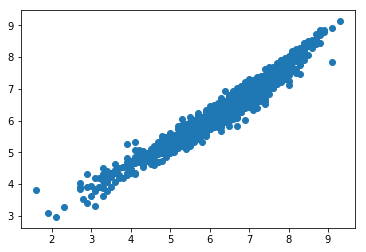

In [28]:
#RandomForestRegressor
plt.scatter(y_test,y_pred2)


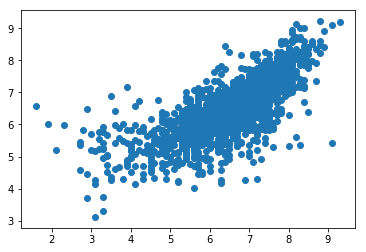

In [29]:
#DECISION REGRESSOR
plt.scatter(y_test, predictions)


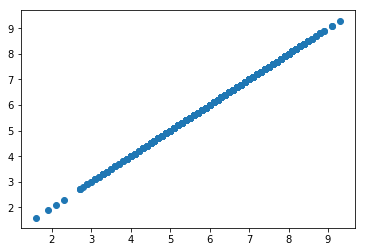

In [30]:
#xgbboost regressor
plt.scatter(y_test,y_pred1)

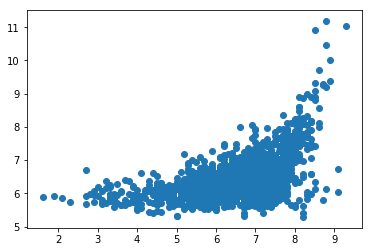

In [31]:
#LINEAR REGRESSION
plt.scatter(y_test,y_pred)

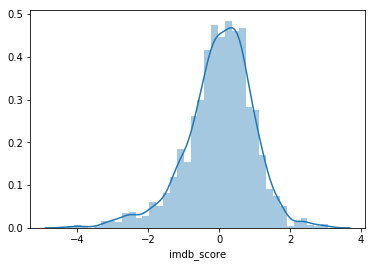

In [32]:
##LINEAR REGRESSION
sns.distplot((y_test-y_pred))

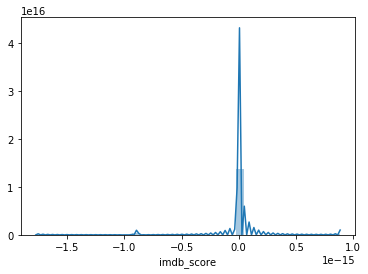

In [33]:
#xgbboost regressor
sns.distplot((y_test-y_pred1))

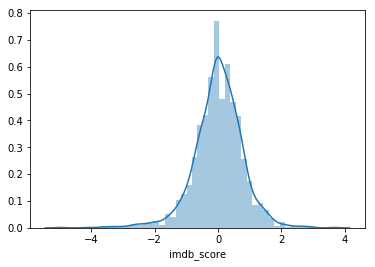

In [34]:
#decision tree regressor
sns.distplot((y_test-predictions))

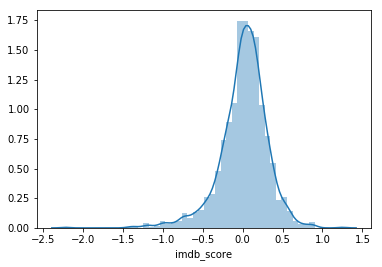

In [35]:
sns.distplot((y_test-y_pred2))


In [36]:
#order of algorithms used wrt to accuracy:
#RANDOM FOREST REGRESSOR>XGBOOST REGRESSOR>LINEAR REGRESSOR>DECISION TREE REGRESSOR

In [37]:
bc = data.corr()

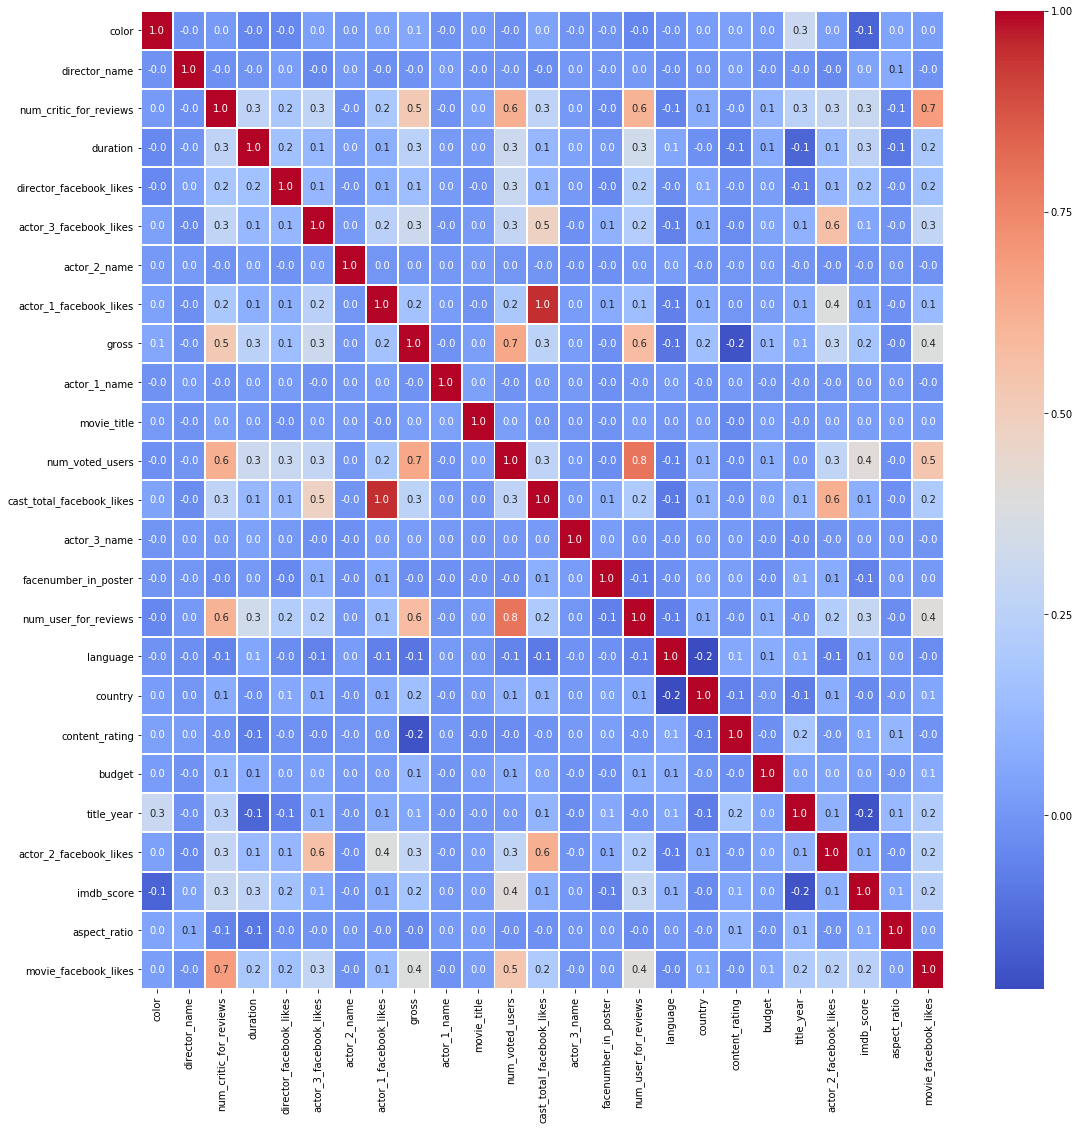

In [38]:
f,ax = plote.subplots(figsize = (18,18))
sns.heatmap(bc,cmap = 'coolwarm', linewidths= 1,linecolor = 'White',annot = True,fmt = '.1f',ax=ax)


In [39]:
#2>actor2_name is highly related to cast_total_facebook_likes.

In [40]:
X = data.drop(['genres','plot_keywords','imdb_score','movie_imdb_link','actor_1_facebook_likes'], axis=1)
Y = data['imdb_score']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y ,test_size=0.3)
logreg3=LinearRegression()
logreg3.fit(X_train,y_train)
y_pred3 = logreg3.predict(X_test)

y_pred3
print(metrics.mean_squared_error(y_test, y_pred))



1.767166727247851
